# Autoencoders

In [1]:
#import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("numerai_training_data_.csv")

In [3]:
train_data = train_data.drop(['target'], 1)

In [4]:
col_max = train_data.apply(max, axis=0)
col_min = train_data.apply(min, axis=0)

In [5]:
print zip(col_min,col_max)

[(0.011190854236643399, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0026839202889124103, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.00091455346283621502, 1.0), (0.0, 0.99043905701634405), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.99331076814826103), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]


* All the features are in the range [0,1], decided not to normalize the features

In [6]:
corr = train_data.corr()

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

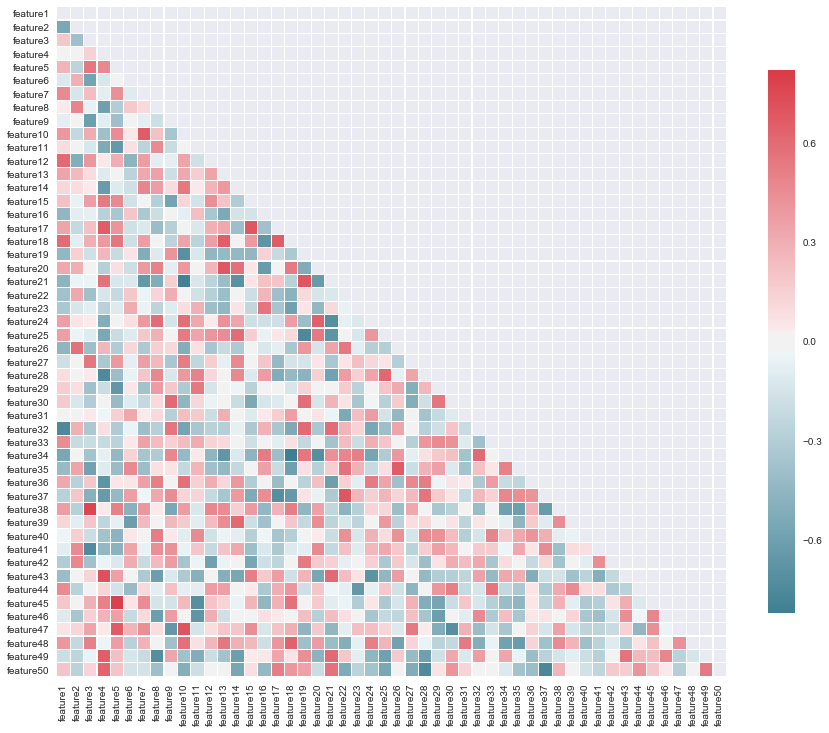

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=0.1, 
            cbar_kws={"shrink": .5}, ax=ax)

# Creating feed forward neural network

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 260
batch_size = 128
display_step = 10

In [ ]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [ ]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [ ]:
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3"),
'decoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_3, n_hidden_2)), name="w_d_h1"),
'decoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_1)), name="w_d_h2"),
'decoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_input)),    name="w_d_h3")
}
biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [ ]:
biases['encoder_b1'].dtype

In [ ]:
#Add histogram summaries for weights

tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

In [ ]:
# Building the encoder
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']))
# Encoder Hidden layer with sigmoid activation #2
    with tf.name_scope("en_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                                          biases['encoder_b2']))
# Encoder Hidden layer with sigmoid activation #3
    with tf.name_scope("en_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                                          biases['encoder_b3']))
    return layer_3

In [ ]:
# Building the decoder
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                                          biases['decoder_b2']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                                          biases['decoder_b3']))
    return layer_3


In [ ]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [ ]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [ ]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/autoencoder_logs", sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init)
    total_batch = int(len(train_data)/batch_size)
    
    # Training cycle
    for epoch in xrange(training_epochs):
    # Loop over all batches
        for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
            batch_xs = train_data[start:end]
            
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})
        
        writer.add_summary(summary, epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0 or epoch+1 == training_epochs:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(c))
            
    recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

In [ ]:
len(recon_ip)

In [ ]:
len(train_data.values)

In [ ]:
recon_ip_df = pd.DataFrame(recon_ip)
reduced_ip_df = pd.DataFrame(reduced_ip)

In [ ]:
recon_ip_df

In [ ]:
pd.DataFrame(train_data[0:4])

In [ ]:
pd.DataFrame(reduced_ip)

# PCA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [17]:
svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5, svd_solver=svd_solver)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004783325
PCA Reconstruction loss( full ) :  0.004783325
PCA Reconstruction loss( arpack ) :  0.004783325
PCA Reconstruction loss( randomized ) :  0.004783325


In [18]:
svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5, svd_solver=svd_solver, whiten=True)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004783325
PCA Reconstruction loss( full ) :  0.004783325
PCA Reconstruction loss( arpack ) :  0.004783325
PCA Reconstruction loss( randomized ) :  0.004783325


* Different solvers with or without whiten is giving the same result

# KernelPCA
** Discarding KPCA as it runs out of memory

In [57]:
#from sklearn.decomposition import KernelPCA

In [12]:
'''kpca = KernelPCA(n_components=5,kernel="rbf", gamma=10, n_jobs=-1)
kpca_encomp = kpca.fit_transform(train_data)
kpca_decomp = kpca.inverse_transform(kpca_encomp)
kpca_recon_loss = mean_squared_error(train_data, kpca_decomp)
print "KPCA Reconstruction loss: ", kpca_recon_loss'''

'kpca = KernelPCA(n_components=5,kernel="rbf", gamma=10, n_jobs=-1)\nkpca_encomp = kpca.fit_transform(train_data)\nkpca_decomp = kpca.inverse_transform(kpca_encomp)\nkpca_recon_loss = mean_squared_error(train_data, kpca_decomp)\nprint "KPCA Reconstruction loss: ", kpca_recon_loss'

# SparsePCA

In [14]:
from sklearn.decomposition import SparsePCA

In [15]:
spca = SparsePCA(n_components=5,n_jobs=4,verbose=True, method='cd')
spca_encomp = spca.fit_transform(train_data)

[dict_learning] ........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [16]:
spca_decomp = np.dot(spca_encomp, spca.components_)
spca_recon_loss = mean_squared_error(train_data, spca_decomp)
print "SparsePCA Reconstruction loss: ", spca_recon_loss

SparsePCA Reconstruction loss:  0.00599510100034


In [19]:
spca.get_params

<bound method SparsePCA.get_params of SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='cd',
     n_components=5, n_jobs=4, random_state=None, ridge_alpha=0.01,
     tol=1e-08, verbose=True)>